In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### Центральная предельная теорема своими руками

1. Выберем непрерывное распределение:

    __Powerlaw__ (частный случай бета-распределения с $b=1$)

    Функция плотности: $f(x,a) = ax^{a-1}$, $0\le x\le 1, a>0$

    Зададим $a=5$: $f(x) = 5x^4$

In [2]:
a = 5
rv = sts.powerlaw(a)

2. Сгенерируем выборку объема $1000$ и построим гистрограмму выборки:

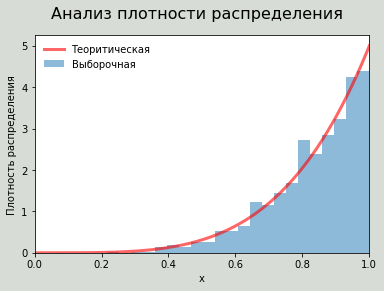

In [3]:
x = np.linspace(0, 1, 1000)

simple = rv.rvs(1000)

fig, ax = plt.subplots(1, 1)
ax.hist(simple, bins='auto', density=True, alpha=0.5, label='Выборочная')
ax.plot(x, rv.pdf(x),
         'r-', lw=3, alpha=0.6, label='Теоритическая')

ax.set_xlabel('x')
ax.set_ylabel('Плотность распределения')
ax.set_xlim(0, 1)

fig.set_facecolor('#d8dcd6')
fig.suptitle('Анализ плотности распределения', fontsize=16)

plt.legend(loc='best',frameon=False)
plt.show()

3. Оценим выборочное среднее при разных объемах выборки

    $n=[3, 15, 50]$

    И построим гистрограммы распределения их выборочных значений

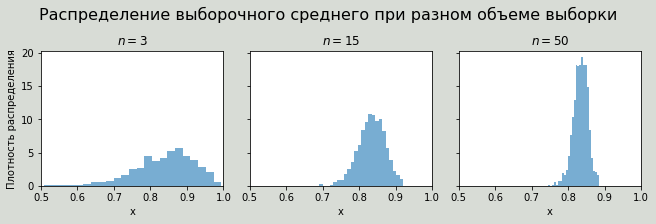

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), constrained_layout=True,
                        sharex='all', sharey='all')

for i, n in enumerate([3, 15, 50]):

    average = [np.average(rv.rvs(n)) for _ in range(1000)]

    axs[i].hist(average, bins='auto', density=True, alpha=0.6)

    axs[i].set_title(f'$n={n}$')
    axs[i].set_xlabel('x')


fig.set_facecolor('#d8dcd6')
plt.xlim(0.5, 1)

fig.suptitle('Распределение выборочного среднего при разном объеме выборки', fontsize=16)
axs[0].set_ylabel('Плотность распределения')

plt.show()

4. Загуглим мат.ожидание и дисперсию случайной величины $X$, имеющей бета-распределение:

    - Математическое ожидание:

    $\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta} = 5/6$

    - Дисперсия:

    $\mathbb{D}[X] = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)} = 5/252$

5. Построим нормальные распределения, которые, согласно центральной предельной теоремы, 
приближают распределение выборочных средних
    
    - Среднее значение:
    
    $\mu = \mathbb{E}[X] = 5/6 = 0,833...$
    
    - Стандарное отклонение выборочных значений:

    $\sigma =\sqrt{\frac{\mathbb{D}[X]}{n}} = \sqrt{\frac{5}{252/n}}$, где $n$ - объем выборки

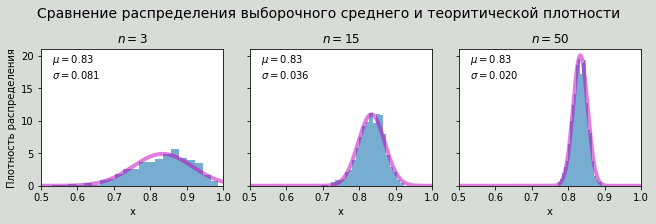

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), constrained_layout=True,
                        sharex='all', sharey='all')

for i, n in enumerate([3, 15, 50]):

    average = [np.average(rv.rvs(n)) for _ in range(1000)]
    pdf = sts.norm(5/6, (5/252/n)**0.5).pdf

    axs[i].hist(average, bins='auto', density=True, alpha=0.6)
    axs[i].plot(x, pdf(x),
            'm-', lw=4, alpha=0.5, label=f'Normal PDF')

    axs[i].text(0.53, 16.5, f'$\mu={5/6:.2f}$\n$\sigma={(5/252/n)**0.5:.3f}$')

    axs[i].set_title(f'$n={n}$')
    axs[i].set_xlabel('x')


fig.set_facecolor('#d8dcd6')
plt.xlim(0.5, 1)

fig.suptitle('Сравнение распределения выборочного среднего и теоритической плотности', fontsize=14)
axs[0].set_ylabel('Плотность распределения')

plt.show()

### Вывод

При увеличении объема выборки $n$ - точность аппроксимации распределения
выборочных средних так же увеличивается

То есть плотность выборочного среднего приближается к теоретическому мат. ожиданию